<a href="https://colab.research.google.com/github/jamesmattluyon/CPE-AIDL/blob/main/notebooks/module%2001/deeplearn_01v1_lec1_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Topic 1: Neural Networks Review
$_{\text{©D.J. Lopez | 2022 | Deep Learning}}$


In [ ]:
# !pip install tensorflow
# !pip install tensorflow-gpu
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


## Part 1 Tensor Operations

[TensorFlow](https://www.tensorflow.org/) is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications.<br>
TensorFlow provides several APIs that allow developers to develop a range of AI Apps from data estimation, computer vision, natural language processing, and even reinforcement learning.
![image](https://camo.githubusercontent.com/c04e16c05de80dadbdc990884672fc941fdcbbfbb02b31dd48c248d010861426/68747470733a2f2f7777772e74656e736f72666c6f772e6f72672f696d616765732f74665f6c6f676f5f736f6369616c2e706e67)<br>

TensorFlow mainly operates using tensors (as its name suggests) so let’s try to use our current knowledge about tensors and apply it with our current platform.

### 1.1 NumPy and TensorFlow
If you have enjoyed using matrices and tensors in NumPy, then performing tensor algebra in TensorFlow will just be a breeze.

In [ ]:
np_tensor = np.array(3)
tf_tensor = tf.constant(3)

print(np_tensor)
print(tf_tensor)

3
tf.Tensor(3, shape=(), dtype=int32)


In [ ]:
np_mat = np.array([
                   [1,2],
                   [3,1]
], dtype=float)
tf_mat = tf.constant([
                      [1,2],
                      [3,1]
], dtype=float)
print(np_mat)
print(tf_mat)

[[1. 2.]
 [3. 1.]]
tf.Tensor(
[[1. 2.]
 [3. 1.]], shape=(2, 2), dtype=float32)


In [ ]:
type(tf_mat.numpy())

numpy.ndarray

In [ ]:
A = tf_mat
B = tf.transpose(tf_mat)
print(f"Matrix A: \n{A}")
print(f"Matrix B: \n{B}")
print(f"Sum of Tensors: \n{A+B}")
print(f"Difference of Tensors: \n{A-B}")
print(f"Product of Tensors: \n{A*B}")

Matrix A: 
[[1. 2.]
 [3. 1.]]
Matrix B: 
[[1. 3.]
 [2. 1.]]
Sum of Tensors: 
[[2. 5.]
 [5. 2.]]
Difference of Tensors: 
[[ 0. -1.]
 [ 1.  0.]]
Product of Tensors: 
[[1. 6.]
 [6. 1.]]


In [ ]:
print(f"Dot Product of Tensors: \n{A@B}")

Dot Product of Tensors: 
[[ 5.  5.]
 [ 5. 10.]]


In [ ]:
C = tf.reshape(A, [4,1])
C

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[1.],
       [2.],
       [3.],
       [1.]], dtype=float32)>

## Part 2: Machine Learning Revisited
As we recall, machine learning takes in data and a program to produce a rule or determine a pattern as opposed with traditional program that requires a pattern or rule together with the data to create a working system.

Machine learning can be further classified into several cognitive paradigms:

<b>Supervised learning</b>— is a type of machine learning that requires input data to have a feature and a label or the typical X data and y label format. Supervised learning requires its dataset to be:
* Large (Volume)
* Various
* Valid

<b>Unsupervised learning</b>—unlike input data from supervised learning, unsupervised learning data doesn't have labels. Unsupervised learning aims to find patterns in unexplored data. Typical applications of unsupervised learning include: dimension reduction and clustering.

<b>Reinforcement learning</b>—the inputs for a reinforcement learning algorithm requires little to none data (in form of a dataset) to succeed in learning. Reinforcement learning aims to learn a rule, policy, or “way to do stuff” by determining whether its actions for a certain environment is rewarded or punished by its algorithm. The common uses of reinforcement learning included optimization.

In the succeeding topics, we will be focusing on supervised learning using Deep Neural Networks.

### 2.1 The Neuron (Again)
![image](https://svitla.com/uploads/ckeditor/ArtificialNeuronModel_english.jpg)<br>

Recalling our last discussion with the neuron, we found out that it is the basic unit of a neural network. The learning process of the neuron consists of a feed-forward propagation in which it takes in several inputs in which it is multiplied by some weights and fed into a transfer function and then subjected to an activation function; and a backward propagation routine where it computes for the loss and cost of a neuron and uses the error value to update the weights and repeating until it converges (or even diverge) to a certain period of training

In [ ]:
#Features
X = np.arange(-1,5,dtype=float)
def fx(x): return 2*x-1
#Targets/Labels
y = np.array(list(map(fx,X)))

In [ ]:
print(X)
print(y)

[-1.  0.  1.  2.  3.  4.]
[-3. -1.  1.  3.  5.  7.]


In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import MSE, MAE

In [ ]:
### Dense Layer
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=1, input_shape=[1])
])
lr=0.01
model.compile(optimizer=SGD(learning_rate=lr),
              loss=MSE)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = model.fit(X,y,epochs=200)

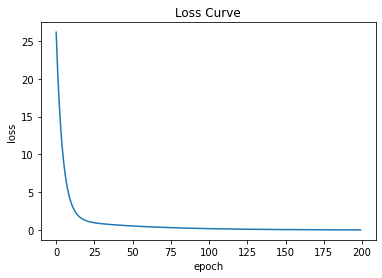

In [ ]:
plt.title('Loss Curve')
plt.plot(history1.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [ ]:
model.predict([10.0])

array([[18.541748]], dtype=float32)

## Part 3: Neural Networks

### 3.1 Multilayer Perceptron
![image](https://www.researchgate.net/profile/Facundo_Bre/publication/321259051/figure/fig1/AS:614329250496529@1523478915726/Artificial-neural-network-architecture-ANN-i-h-1-h-2-h-n-o.png)

As the name suggests, a multilayer perceptron (MLP) is a network of neurons or perceptrons arrange and connected horizontally and vertically. In this setup, neurons share knowledge along their respective layer and passes the activated values to the next layers to have a sense of "deep" learning. The concept of MLP gave rise to develop the new field of machine learning—Deep Learning, where we study about Artificial Neural Networks (ANN).

An ANN consists of three parts:
* Input layer
* Hidden layer(s)
* Output layer
However, when counting the number of layers of a neural network we exclude the input layer since no learning is happening at the input layer or Layer 0 ($L0$).

In [ ]:
### Multilayer Perceptron
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=16,input_shape=[1]), #Hidden Layer
  tf.keras.layers.Dense(units=1) #Output layer
])

lr=0.01
model.compile(optimizer=SGD(learning_rate=lr),
              loss=MSE)
model.summary()
history2=model.fit(X,y, epochs=200)

In [ ]:
plt.title('Loss Curve')
plt.plot(history1.history['loss'], label='Single Neuron')
plt.plot(history2.history['loss'], label='MLP')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
model.predict([10.0])

### 3.2 Activation Functions

![image](https://www.researchgate.net/profile/Junxi_Feng/publication/335845675/figure/fig3/AS:804124836765699@1568729709680/Commonly-used-activation-functions-a-Sigmoid-b-Tanh-c-ReLU-and-d-LReLU.ppm)

Back in our discussion about the neuron, we know that an activaiton function is quite crucial in getting the right values. Different activation functions are used for different objectives of learning. One factor to consider in choosing an activation function is the behavior of outputs per layer or the expected output of the machine learning task. Simply, identifying whether you are classifying data or predicting data could help which activation function to use.

For a deeper discussion and implementation check out:
* [Activation functions in TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
* [Activation functions in Keras](https://keras.io/api/layers/activations/)


In [ ]:
from tensorflow.keras.layers import Activation
from tensorflow.nn import sigmoid, tanh, softmax, relu, leaky_relu

In [ ]:
inputs = tf.constant([
                      [0.0,-1.2,2.4,32.0,-20.1]
                      ])
print(inputs)

In [ ]:
### Sigmoid
sigmoid_layer = Activation(sigmoid)
sigmoid_layer(inputs).numpy()

In [ ]:
### Tanh
tanh_layer = Activation(tanh)
tanh_layer(inputs).numpy()

In [ ]:
### Softmax
softmax_layer = Activation(softmax)
softmax_layer(inputs).numpy()

In [ ]:
### ReLU
relu_layer = Activation(relu)
relu_layer(inputs).numpy()

In [ ]:
### Leaky ReLU
lrelu_layer = Activation(leaky_relu)
lrelu_layer(inputs).numpy()

### Part 3.2 Linear Classification
Multiple Layer Perceptrons are designed for non-linear classification and prediction activities. But that does not mean that it cannot perform linear operations as well. In this section, we will revisit an example from machine learning, the linear classifier.

In [ ]:
def plot_boundary(clf, X, Y):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k');

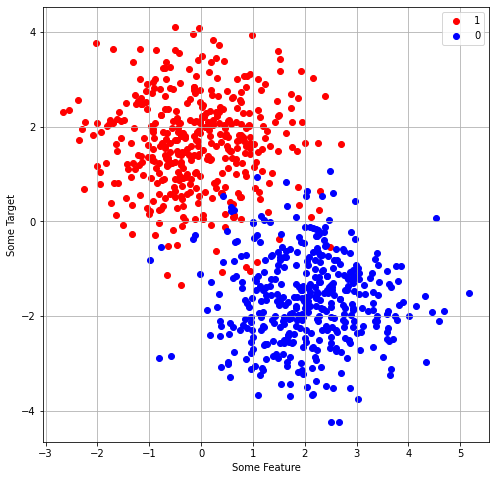

In [ ]:
N = 800
cov = 0
center1 = np.array([0, 1.7]).T
cov_mat1 = np.array([
                    [1,cov],
                    [cov,1]
])

center2 = np.array([2, -1.7]).T
cov_mat2 = np.array([
                    [1,cov],
                    [cov,1]
])

np.random.seed(0)
X1 = np.array(np.random.multivariate_normal(center1,cov_mat1,int(N/2)))
X2 = np.array(np.random.multivariate_normal(center2,cov_mat2,int(N/2)))

plt.figure(figsize=(8,8))
plt.scatter(X1[:,0],X1[:,1], c='r', label='1')
plt.scatter(X2[:,0],X2[:,1], c='b', label='0')
plt.ylabel("Some Target")
plt.xlabel("Some Feature")
plt.legend()
plt.grid()
plt.show()

In [ ]:
X1 = np.append(X1,np.ones((X1.shape[0],1)),axis=1)
X2 = np.append(X2,np.zeros((X2.shape[0],1)),axis=1)

### Combine to a single dataset
X = np.vstack((X1,X2))
np.random.shuffle(X)
X_train = X[:,0:2]
y_train = X[:,-1]

In [ ]:
### Dense Layer
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(2, input_dim=2, activation='relu'))
model3.add(tf.keras.layers.Dense(10, activation='relu'))
model3.add(tf.keras.layers.Dense(1, activation='sigmoid'))
lr=0.01
model3.compile(optimizer=SGD(learning_rate=lr),
              loss='binary_crossentropy',
              metrics = ['accuracy'])
model3.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 2)                 6         
                                                                 
 dense_83 (Dense)            (None, 10)                30        
                                                                 
 dense_84 (Dense)            (None, 1)                 11        
                                                                 
Total params: 47
Trainable params: 47
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history3 = model3.fit(X_train,y_train,epochs=50, batch_size=1)
plt.figure(figsize=(14,7))
plt.title('Loss Curve')
plt.subplot(121)
plt.plot(history3.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.subplot(122)
plt.plot(history3.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

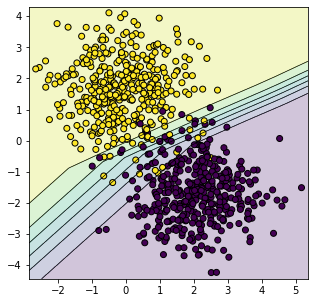

In [ ]:
plot_boundary(model3, X_train, y_train)

### Part 3.3 Non-linear Classification
We'll now try to use the same MLP from the linear classifier to a non-linear problem. You can see from the results of the training that the model can still solve a different problem with the same neural network structure. However, you can try to modify the network to see how the classification differs as you change the parameters of the network.

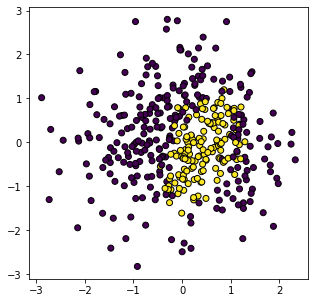

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(5)

def f(X):
    X = X.copy()
    X[:,0] -= 0.4
    X[:,1] += 0.2
    return 1.1*X[:,0]**2 + 0.3*X[:,1]**2 - 0.6*X[:,0]*X[:,1]

def make_data():
    N = 800
    X = np.random.normal(size=(N, 2))
    Y = f(X) < 0.5
    X += np.random.normal(size=(N,2), scale=0.2)
    return X, Y

X, Y = make_data()

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.5)

plt.figure(figsize=(5,5))
plt.scatter(Xtrain[:,0], Xtrain[:,1], c=Ytrain, edgecolors='k');

In [ ]:
### Dense Layer
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(2, input_dim=2, activation='relu'))
model2.add(tf.keras.layers.Dense(10, activation='relu'))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))
lr=0.01
model2.compile(optimizer=SGD(learning_rate=lr),
              loss='binary_crossentropy',
              metrics = ['accuracy'])
model2.summary()

In [ ]:
history2 = model2.fit(X_train,y_train,epochs=50, batch_size=1)


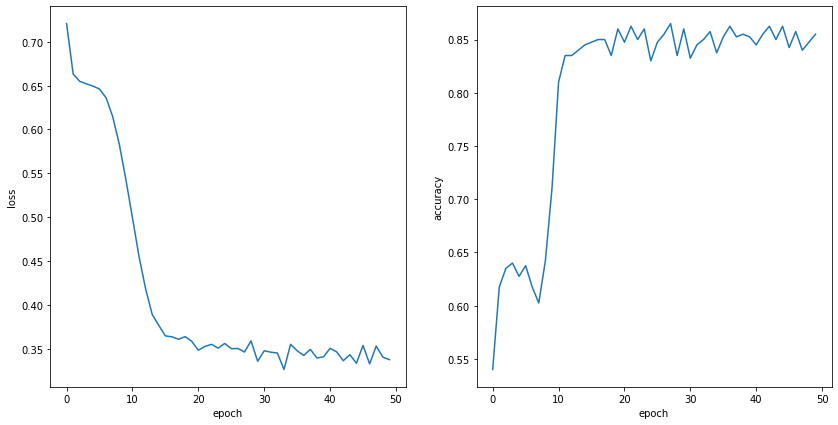

In [ ]:
plt.figure(figsize=(14,7))
plt.title('Loss Curve')
plt.subplot(121)
plt.plot(history2.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.subplot(122)
plt.plot(history2.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

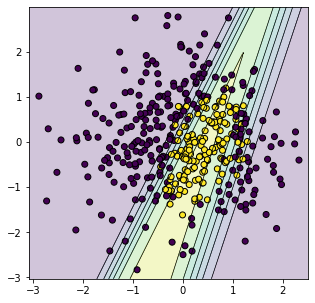

In [ ]:
plot_boundary(model2, X_train, y_train)